In [2]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmss10',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXGeneral',
 'STIXGeneral',
 'cmmi10',
 'cmb10',
 'cmr10',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'cmex10',
 'cmsy10',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'cmtt10',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'Trebuchet MS',
 'LG PC',
 'Leelawadee UI',
 'Perpetua',
 'Agency FB',
 'MingLiU-ExtB',
 'Cambria',
 'Segoe UI',
 'Yu Gothic',
 'Candara',
 'Bookman Old Style',
 'Kristen ITC',
 'Microsoft YaHei',
 'Brush Script MT',
 'Lucida Bright',
 'Matura MT Script Capitals',
 'Tw Cen MT',
 'Leelawadee UI',
 'Microsoft Tai Le',
 'Niagara Solid',
 'Con

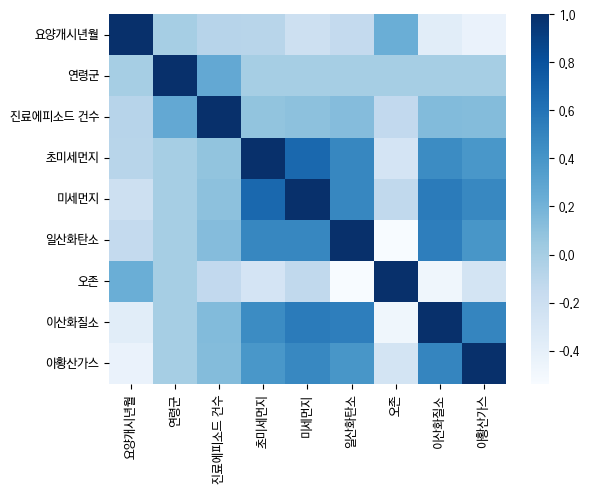

In [7]:

plt.rcParams['axes.unicode_minus'] = False

import pandas as pd
pd.set_option('display.width', 170)
# 데이터들을 전부 보기 위해 row, col 생략 없이 출력하도록 하였으며 데이터가 항상 float 형식으로 소수점 이하 6자리까지 출력되도록 하였습니다.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.6f}'.format
df = pd.read_csv("비염+대기오염지수.csv")

import seaborn as sns
import matplotlib.pyplot as plt 
# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)    
plt.rcParams['font.family'] = 'LG PC'
plt.show()

In [10]:

cor_target_abs2 = abs(cor['진료에피소드 건수']).sort_values(ascending=False).iloc[1:6]
print(cor_target_abs2)

연령군     0.268376
이산화질소   0.141139
아황산가스   0.134937
일산화탄소   0.133359
오존      0.132103
Name: 진료에피소드 건수, dtype: float64


In [12]:
pip install scikit-learn


                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 890.4 kB/s eta 0:00:11
                                              0.1/9.2 MB 1.7 MB/s eta 0:00:06
     -                                        0.3/9.2 MB 2.1 MB/s eta 0:00:05
     -                                        0.4/9.2 MB 2.0 MB/s eta 0:00:05
     --                                       0.5/9.2 MB 2.2 MB/s eta 0:00:04
     --                                       0.6/9.2 MB 2.3 MB/s eta 0:00:04
     ---                                      0.8/9.2 MB 2.2 MB/s eta 0:00:04
     ----                                     0.9/9.2 MB 2.3 MB/s eta 0:00:04
     ----                                     1.1/9.2 MB 2.4 MB/s eta 0:00:04
     -----                                    1.2/9.2 MB 2.3 MB/s eta 0:00:04
     -----                                    1.3/9.2 MB 2.3 MB/s eta 0:00:04
     ------                                   1.4/9.2 MB 2.3 MB/s et

In [14]:
cor_target_features = cor_target_abs2.index.tolist()

In [19]:
#모델 만들기
# 3-1. 기대 수명을 예측하는 선형 회귀 모델을 만들어보자. 상관계수가 높았던 5개 특징을 선형 회귀 모델의 입력 X로 정의하자

from sklearn.linear_model import LinearRegression

# 입력 변수와 출력 변수 정의(상관계수가 높았던 5개 특징을 선형 회귀 모델의 입력 X로 정의, 예측할 'Life expectancy' y로 정의)
# 결측데이터를 제거한 데이터 사용
X = df[cor_target_features]
y = df['진료에피소드 건수']

# 3-2. 훈련용과 테스트용 데이터로 분리한다. test_size=.33, random_state=42로 설정한다
# r2 score로 모델 성능을 평가한다
print("#3-2")

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

#선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# r2 score 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print('5개의 특징을 입력 x로 정의한 모델의 r2 score :' + str(r2))


# 3-3. 문자열 특징을 제외하고 가능한 한 많은 특징을 사용해서 선형 회귀 모델을 다시 만들어 보자 
#print("\n#3-3")

# 문자열이 포함된 특징('Country', 'Status') 제외하기
df_no_object = df_dropped.drop(['Country', 'Status'], axis=1)

# 데이터 분리 ('Life expectancy'를 제외한 특징들을 입력 변수로 정의함.) 
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns !='진료에피소드 건수'], df['진료에피소드 건수'], test_size=.33, random_state=42)
# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# r2 score 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print('문자열 특징을 제외하고 가능한 많은 특징을 사용한 모델의 r2 score :' + str(r2))

#3-2
5개의 특징을 입력 x로 정의한 모델의 r2 score :0.10372215308332888


ValueError: could not convert string to float: '서울특별시'